<a href="https://colab.research.google.com/github/Vinicius-BFS/data_science_projetos/blob/main/Mini_Projeto_Roof_Imoveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://i.imgur.com/kCNAFTN.jpg?1)







#**Contextualização**
Roof Imóveis é uma das maiores empresas do ramo imobiliário Brasileiro
e quer expandir sua área de atuação fazendo um investimento internacional,
com isso, ela contratou você para uma consultoria estratégica.
A empresa irá investir em imóveis no Condado de County, nos Estados
Unidos.
O Condado de King é um dos 39 condados do estado americano de
Washington. A sede e cidade mais populosa do condado é Seattle.
 Foi fundado em 1852. Com mais de 2,2 milhões de habitantes, de acordo
com o censo nacional de 2020, é o condado mais populoso do estado e o 12º
mais populoso do país. Wikipédia
O Dataset apresenta a venda de imóveis e suas características na região
de Maio de 2014 à Maio de 2015. Tem um total de 21613 registros com um total
de 21 atributos.

Dataset: https://www.kaggle.com/harlfoxem/housesalesprediction

Dataset detalhado:
https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/

## **Objetivo**
*Identificar os 5 imóveis que a empresa deveria investir e o porquê e quais 5 não são recomendados o investimento de jeito nenhum.*


### **Dicionário de dados**
**id:** Identificador único do imóvel

**date:** Data da Venda

**price:** Preço de venda

**bedrooms:** Nº de Quartos

**bathrooms:** Nº de Banheiros

**sqft_liv:** Tamanho de área habitável em ft²

**sqft_lot:** Tamanho do terreno em ft²

**floors:** Número de andares

**waterfront:** Indicativo se o imóvel é a beira-mar

**view:** Grau de quão belo é a vista do imóvel (0 a 4)

**condition:** Condição da casa (1 a 5)

**grade:** Classificação por qualidade de material utilizado na
construção

**sqft_above:** Área em acima do solo em ft²

**sqft_basmt:** Área em abaixo do solo em ft²

**yr_built:** Ano de construção

**yr_renov:** Ano de restauração, caso o contrário, 0.

**zipcode:** Zip Code 5 - Similar ao CEP

**lat:** Latitude

**long:** Longitude

**squft_liv15:** Média da área habitável dos 15 imóveis mais próximos,
em ft²

**squft_lot15:** Média da área do lote dos 15 imóveis mais próximos,
em ft²


#Preparando o ambiente

In [190]:
#!pip install kaggle #install the kaggle library
#!pip install pyzipcode
#!pip install uszipcode

In [191]:
#Bibliotecas
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import folium
from folium.plugins import HeatMap
%matplotlib inline
from pyzipcode import ZipCodeDatabase
from uszipcode import SearchEngine
import warnings
warnings.filterwarnings('ignore')

In [192]:
# ver todas as colunas
pd.options.display.max_columns = None

In [193]:
# Configuração inicial
sns.set(font_scale=1.4)
sns.set_style({'font.family': 'serif',
               'fontname': 'Times New Roman'})

In [194]:
from google.colab import files
files.upload() #enviar o arquivo kaggle.json

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"viniciusfreitas25","key":"d363b808693f1388962aeb43f9c2b05b"}'}

In [195]:
#provisionar o local de armazenamento
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#Alterar a permissão para evitar o aviso durante a partida da ferramenta Kaggle
!chmod 600 ~/.kaggle/kaggle.json

#endereço da API para o download do dataset
!kaggle datasets download -d harlfoxem/housesalesprediction

#Descompactar o arquivo baixado
!unzip \*.zip  && rm *.zip

  0% 0.00/780k [00:00<?, ?B/s]
100% 780k/780k [00:00<00:00, 156MB/s]
Archive:  housesalesprediction.zip
replace kc_house_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: kc_house_data.csv       


#Análise Exploratória

### Base de dados

In [196]:
df = pd.read_csv('kc_house_data.csv', sep=",", encoding="UTF-8")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Estrutura dos dados

In [197]:
# Resumo
print("Linhas: ", df.shape[0])
print("Colunas: ", df.shape[1])
print("\nVariáveis: \n", df.columns.tolist())

Linhas:  21613
Colunas:  21

Variáveis: 
 ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [198]:
dic_list = {"nValores Ausentes": df.isnull().sum(),"nValores Únicos":df.nunique()}
pd.DataFrame(dic_list)

,nValores Ausentes,nValores Únicos
id,0,21436
date,0,372
price,0,4028
bedrooms,0,13
bathrooms,0,30
sqft_living,0,1038
sqft_lot,0,9782
floors,0,6
waterfront,0,2
view,0,5


Percebe-se que não há dados faltantes na base. Outro ponto importante é que a quantidade de ID's únicos é menor que a quantidade total de registros, isto indica que existem imóveis com mais de uma venda

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Campo de data está em formato de string

### Transformação dos dados

In [200]:
df.date = pd.to_datetime(df["date"], format="%Y-%m-%d %H:%M:%S")
#Criando campo de mês e ano
df['month_sale'] = df.date.dt.month
df['year_sale'] = df.date.dt.year

In [201]:
#não faz sentido a variável bathrooms e floors ser float, por não saber se foi erro de digitação,
#vou transformar tudo em int
df['bathrooms'] = df['bathrooms'].astype('int')
df['floors'] = df['floors'].astype('int')

In [202]:
df_transf = df.copy() # Criando uma cópia do df para aplicar as transformações

In [203]:
#Transformando os campos para os formatos adequados
df_transf.id  = df_transf.id .astype(str)
df_transf.waterfront  = df_transf.waterfront .astype(str)
df_transf.view = df_transf.view.astype(str)
df_transf.condition = df_transf.condition.astype(str)
df_transf.grade = df_transf.grade.astype(str)
df_transf.zipcode = df_transf.zipcode.astype(str)
df_transf.bedrooms = df_transf.bedrooms.astype(str)
df_transf.bathrooms = df_transf.bathrooms.astype(str)
df_transf.floors = df_transf.floors.astype(str)
df_transf.yr_built = df_transf.yr_built.astype(str)
df_transf.yr_renovated  = df_transf.yr_renovated.astype(str)
df_transf.month_sale = df_transf.month_sale.astype(str)
df_transf.year_sale = df_transf.year_sale.astype(str)

In [204]:
df_transf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  object        
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  object        
 4   bathrooms      21613 non-null  object        
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  object        
 8   waterfront     21613 non-null  object        
 9   view           21613 non-null  object        
 10  condition      21613 non-null  object        
 11  grade          21613 non-null  object        
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  object        
 15  yr_renovated   2161

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  int64         
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  int64         
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [206]:
cat = df_transf.select_dtypes(include = ['object']).columns.to_list() # Seleciona somente as colunas do tipo Object
num = df_transf.select_dtypes(include = ['int','float']).columns.to_list() # Seleciona somente as colunas do tipo Object

In [207]:
print("Variaveis Númericas :",num, "\n", "Variaveis Categoricas :",cat)

Variaveis Númericas : ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15'] 
 Variaveis Categoricas : ['id', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'month_sale', 'year_sale']


In [208]:
num = ['price', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15']

In [209]:
cat_num = num+['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
               'grade', 'yr_built', 'yr_renovated', 'month_sale', 'year_sale']

In [210]:
print(cat_num)

['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'month_sale', 'year_sale']


In [211]:
df_transf.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sale,year_sale
0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015


### Analisando variáveis Númericas

In [212]:
#principais estatísticas do df
df_transf[num].describe()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,1.510697e+04,1788.390691,291.509045,1986.552492,12768.455652
std,3.671272e+05,918.440897,4.142051e+04,828.090978,442.575043,685.391304,27304.179631
min,7.500000e+04,290.000000,5.200000e+02,290.000000,0.000000,399.000000,651.000000
25%,3.219500e+05,1427.000000,5.040000e+03,1190.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,1910.000000,7.618000e+03,1560.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,2550.000000,1.068800e+04,2210.000000,560.000000,2360.000000,10083.000000
max,7.700000e+06,13540.000000,1.651359e+06,9410.000000,4820.000000,6210.000000,871200.000000


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>],
       [<AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>],
       [<AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

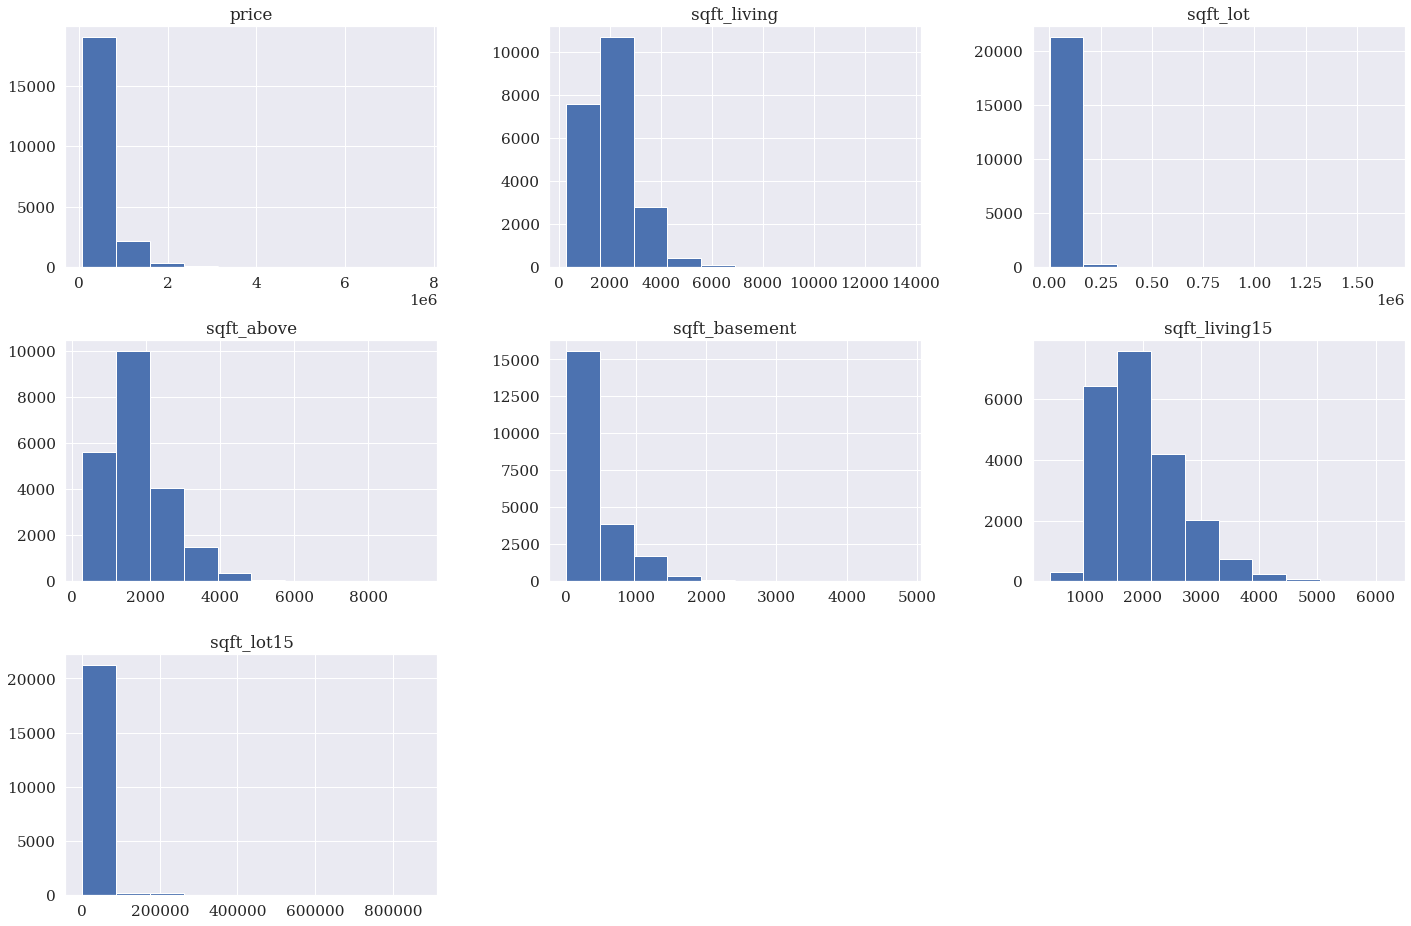

In [213]:
df_transf[num].hist(figsize=(24, 16))

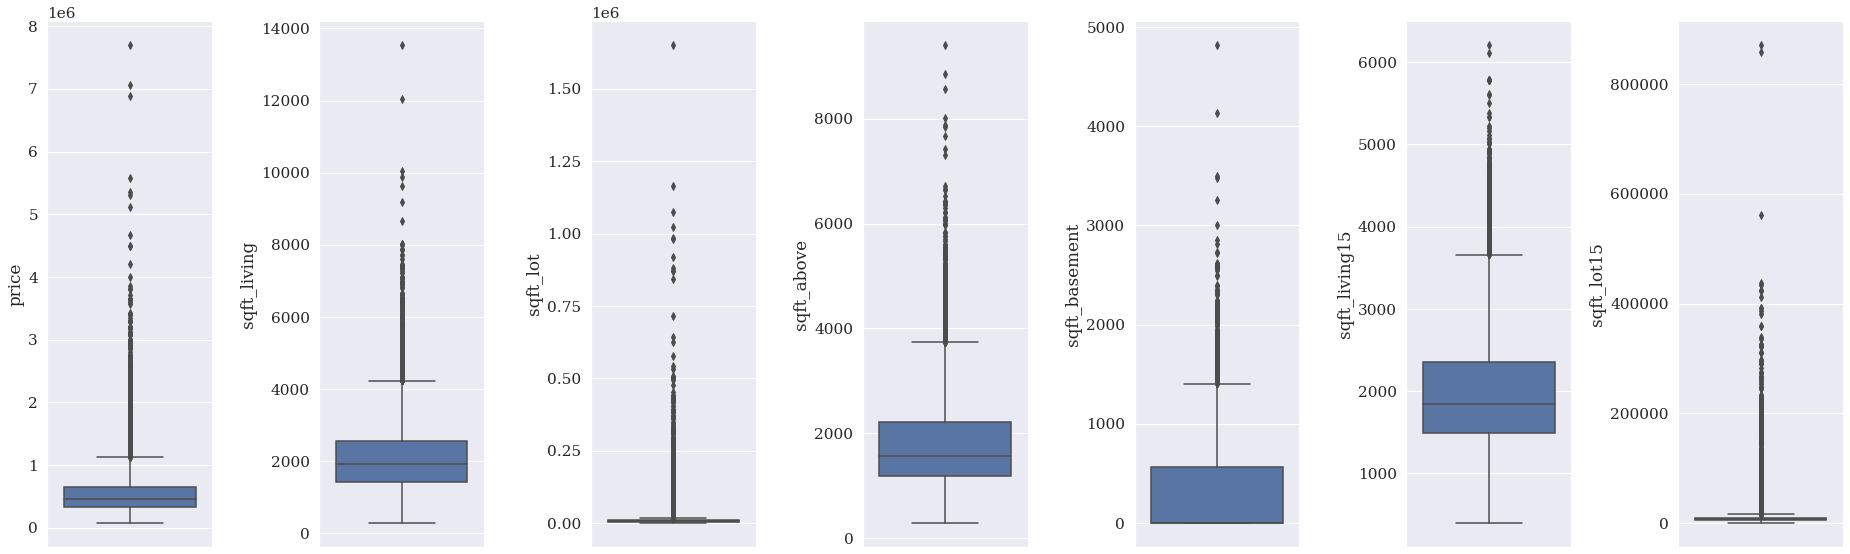

In [214]:
features = num
plt.figure(figsize = (26,8))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y = df_transf[features[i]])
    plt.tight_layout()

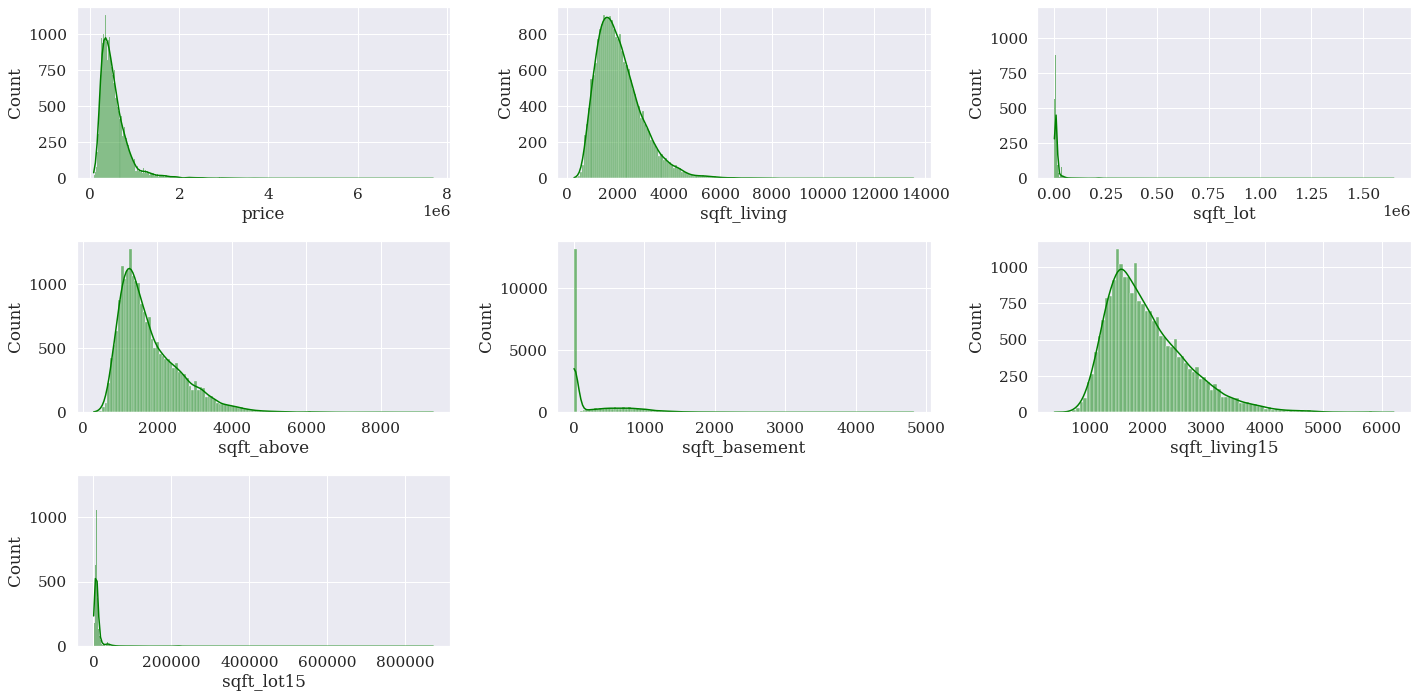

In [215]:
features = num
plt.figure(figsize = (20, 10))
for i in range(0, len(num)):
    plt.subplot(3, 3, i+1)
    sns.histplot(x = df_transf[features[i]], kde = True, color = 'green')
    plt.xlabel(features[i])
    plt.tight_layout()

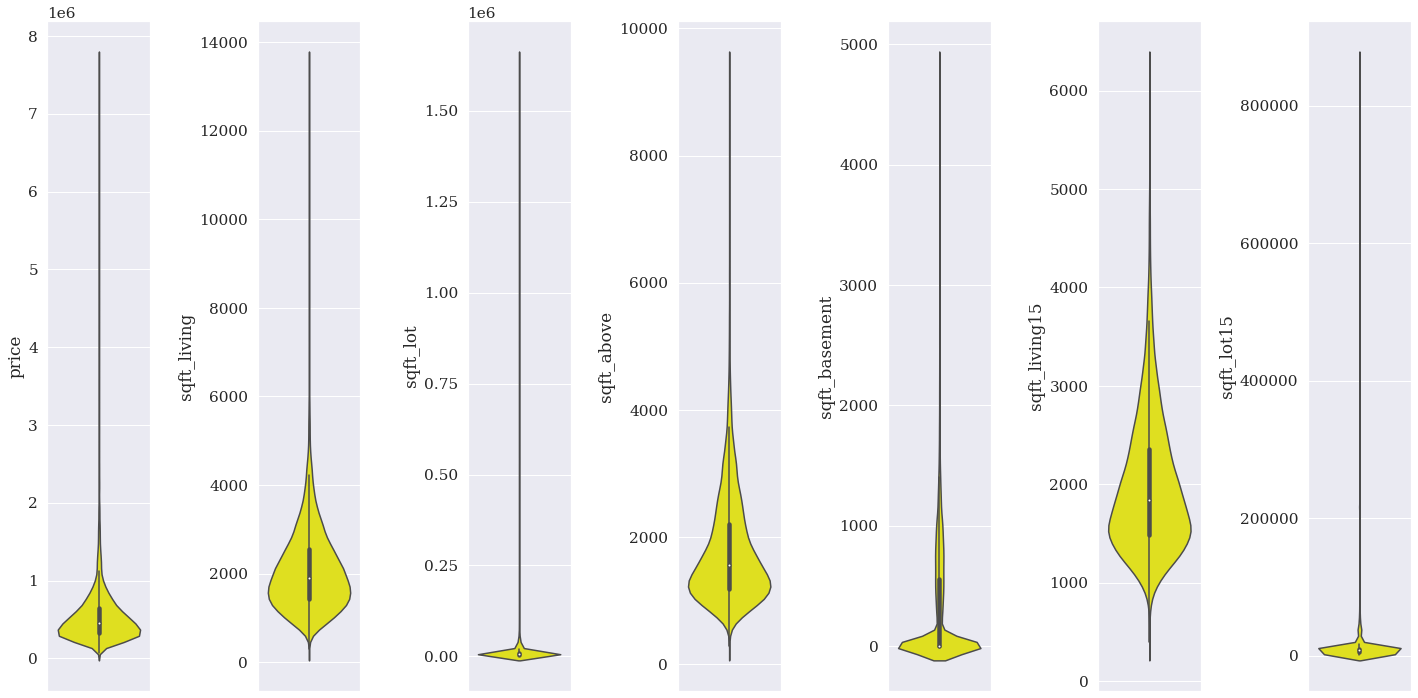

In [216]:
plt.figure(figsize = (20, 10))
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.violinplot(y = df_transf[num[i]], color = 'yellow', orient = 'v')
    plt.tight_layout()

Analisando a distribuição das variáveis númericas, percebemos que os campos `sqft_lot`, `sqft_basmt` e `squft_lot15 ` apresentam uma forte variação, visto que nos gráficos representados (histograma, boxplot e violinplot) é notório um alongamento e tendência positiva a valores extremos

**Algumas observações:**

* A média de preços dos imóveis é de 540.088 e possui uma variação de 367.127 (desvio padrão), o preço dos imóveis podem chegar a 7.700.000. Nota-se também a presença de outiliers, que deverão ser analisados.Percebemos também que os dados não possuem uma distribução normal, dado a distância do preço médio (540.088) e o preço mediano (450.000)
* O tamanho médio da área habitável é 2.079 ft² com variação média no tamanho de 918 ft². Nota-se que existem áreas que vão de 290 ft² até 13.540 ft²
* O tamanho médio dos terrenos 15.106 ft² com variação média no tamanho de 918 ft². Nota-se porém, que os dados estão estranhos, uma vez que o desvio padrão é maior que a média e o maior terrno possui um tamanho de 1.651.359 ft²
* A área média sobre o solo é de 1.788 ft², podendo variar 828ft². Apresenta alguns valores extremos, chegando a 9.410 ft².
* As áreas construídas abaixo do solo é em média 291 ft², chegando até 4.820 ft²

### Analisando variáveis Categoricas

In [217]:
#principais estatísticas do df
cat_d = pd.DataFrame(df_transf[cat].describe())

In [218]:
valores_max_min = {}
for a in cat:
  vlr_min = df[a].min()
  vlr_max = df[a].max()

  valores_max_min[a] = {'min':vlr_min, 'max':vlr_max}
cat_m = pd.DataFrame(valores_max_min)

In [219]:
df_cat = pd.concat([cat_d,cat_m])
df_cat

,id,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,month_sale,year_sale
count,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613
unique,21436,13,9,3,2,5,5,12,116,70,70,12,2
top,795000620,3,2,1,0,0,3,7,2014,0,98103,5,2014
freq,3,9824,10542,12590,21450,19489,14031,8981,559,20699,602,2414,14633
min,1000102,0,0,1,0,0,1,1,1900,0,98001,1,2014
max,9900000190,33,8,3,1,4,5,13,2015,2015,98199,12,2015


In [220]:
cat_x = ['bedrooms',	'floors',	'waterfront',	'view',
       'condition',	'grade']
cat_y = ['bathrooms', 'month_sale',	'year_sale']

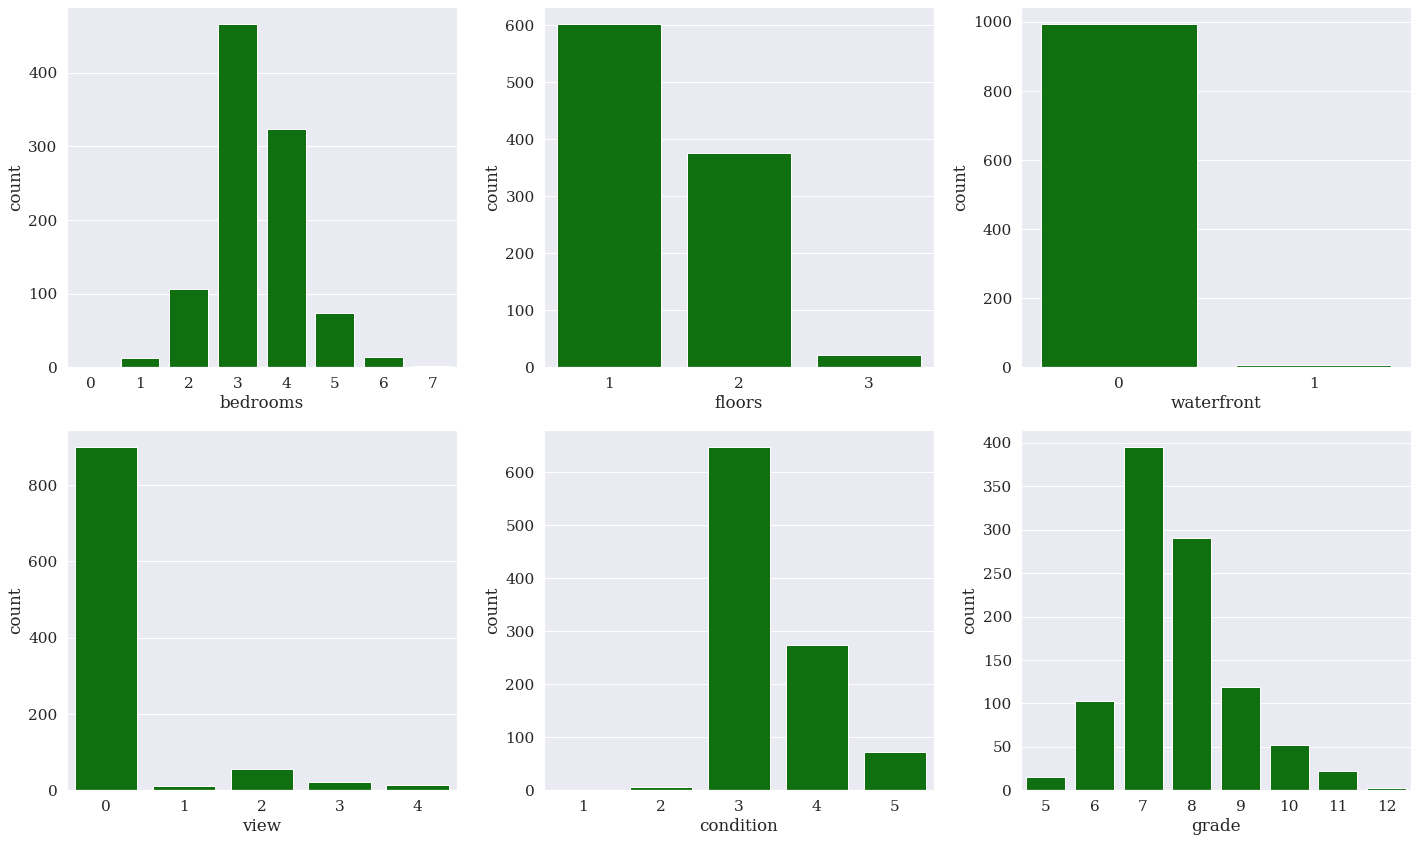

In [221]:
df_sample_x = df.sample(1000, random_state = 42)
plt.figure(figsize = (20, 12))
for i in range(0, len(cat_x)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df_sample_x[cat_x[i]].sort_values(), color = 'green', orient = 'v')
    plt.tight_layout()

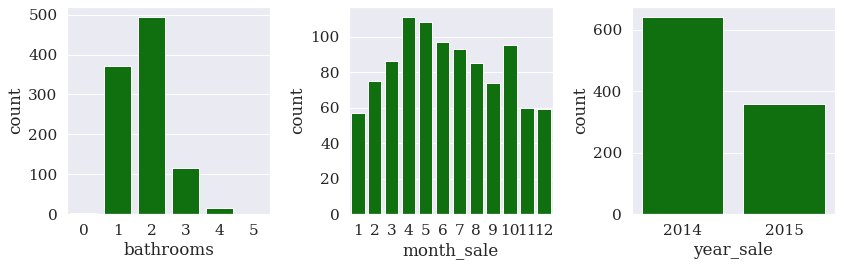

In [222]:
df_sample_y = df.sample(1000, random_state = 42)
plt.figure(figsize = (12, 4))
for i in range(0, len(cat_y)):
    plt.subplot(1, 3, i+1)
    sns.countplot(x = df_sample_y[cat_y[i]].sort_values(), color = 'green', orient = 'v')
    plt.tight_layout()

**Observações:**
* Maioria dos imóveis tem de 3 a 4 quartos
* Maior parte dos imóveis tem 1 ou dois andares
* Grande maioria não é a beira-mar
* Maior parte é mal avaliada quanto a vista
* Maioria dos imóveis recebe nota 3 quanto as condições da cassa
* Qualidade do material utilizado na construção está avaliado entre 3 e 4
* Maioria dos imóveis possuem de 1 a 2 banheiros, sendo o mais comum 2
* Os meses de maio e abril apresentaram o melhor desempenho de vendas

### Análise de outiliers

In [223]:
df_trat = df[df['price']>2000000]
df_trat.shape

(198, 23)

In [224]:
# Calcula os limites superior e inferior
# Um valor outlier é aquele que está abaixo do limite inferior ou acima do limite superior
limite_superior_price = df.price.mean() + 3 * df.price.std()
print("Valor superior:", limite_superior_price)
limite_inferior_price = df.price.mean() - 3 * df.price.std()
print("Valor inferior:", limite_inferior_price)

Valor superior: 1641469.731214629
Valor inferior: -561293.4476815701


In [225]:
# Calcula os limites superior e inferior
# Um valor outlier é aquele que está abaixo do limite inferior ou acima do limite superior
limite_superior_lot = df.sqft_lot.mean() + 3 * df.sqft_lot.std()
print("Valor superior:", limite_superior_lot)
limite_inferior_lot = df.sqft_lot.mean() - 3 * df.sqft_lot.std()
print("Valor inferior:", limite_inferior_lot)

Valor superior: 139368.5021112233
Valor inferior: -109154.56697958957


In [226]:
# Calcula os limites superior e inferior
# Um valor outlier é aquele que está abaixo do limite inferior ou acima do limite superior
limite_superior_basement = df.sqft_basement.mean() + 3 * df.sqft_basement.std()
print("Valor superior:", limite_superior_basement)
limite_inferior_basement = df.sqft_basement.mean() - 3 * df.sqft_basement.std()
print("Valor inferior:", limite_inferior_basement)

Valor superior: 1619.2341735142904
Valor inferior: -1036.2160825505189


In [227]:
# Extra os registros com outliers na coluna desconto
df_outliers_co = df[(df.price <= limite_inferior_price) | (df.price >= limite_superior_price)
& (df.sqft_lot <= limite_inferior_lot) | (df.sqft_lot >= limite_superior_lot)
& (df.sqft_basement <= limite_inferior_basement) | (df.sqft_basement >= limite_superior_basement)]
print(df_outliers_co.shape)
df_outliers_co.head()

(247, 23)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sale,year_sale
10,1736800520,2015-04-03,662500.0,3,2,3560,9796,1,0,0,3,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925,4,2015
41,7766200013,2014-08-11,775000.0,4,2,4220,24186,1,0,0,3,8,2600,1620,1984,0,98166,47.4450,-122.347,2410,30617,8,2014
70,1525059190,2014-09-12,1040000.0,5,3,4770,50094,1,0,0,4,11,3070,1700,1973,0,98005,47.6525,-122.160,3530,38917,9,2014
153,7855801670,2015-04-01,2250000.0,4,3,5180,19850,2,0,3,3,12,3540,1640,2006,0,98006,47.5620,-122.162,3160,9750,4,2015
185,825059270,2014-11-21,1095000.0,5,3,4090,12850,1,0,2,4,10,2090,2000,1986,0,98033,47.6627,-122.188,2540,10270,11,2014


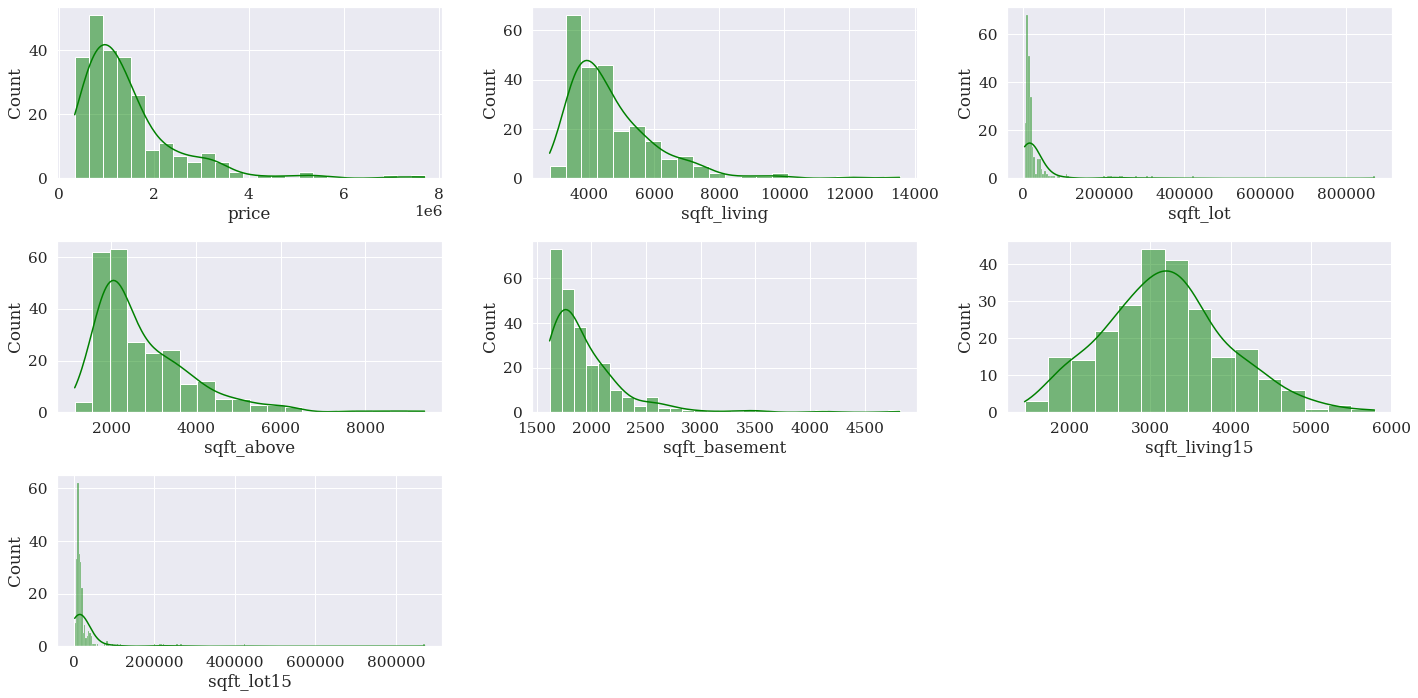

In [228]:
#Visão com outiliers
plt.figure(figsize = (20, 10))
for i in range(0, len(num)):
    plt.subplot(3, 3, i+1)
    sns.histplot(x = df_outliers_co[features[i]], kde = True, color = 'green')
    plt.xlabel(features[i])
    plt.tight_layout()

In [229]:
# Extra os registros com outliers na coluna desconto
df_outliers_so = df[(df.price >= limite_inferior_price) & (df.price <= limite_superior_price)
& (df.sqft_lot >= limite_inferior_lot) & (df.sqft_lot <= limite_superior_lot)
& (df.sqft_basement >= limite_inferior_basement) & (df.sqft_basement <= limite_superior_basement)]
print(df_outliers_so.shape)
df_outliers_so.head()

(20707, 23)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sale,year_sale
0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [242]:
df_outliers_so.price.describe()

count    2.070700e+04
mean     5.012844e+05
std      2.548682e+05
min      7.500000e+04
25%      3.170000e+05
50%      4.420000e+05
75%      6.220000e+05
max      1.640000e+06
Name: price, dtype: float64

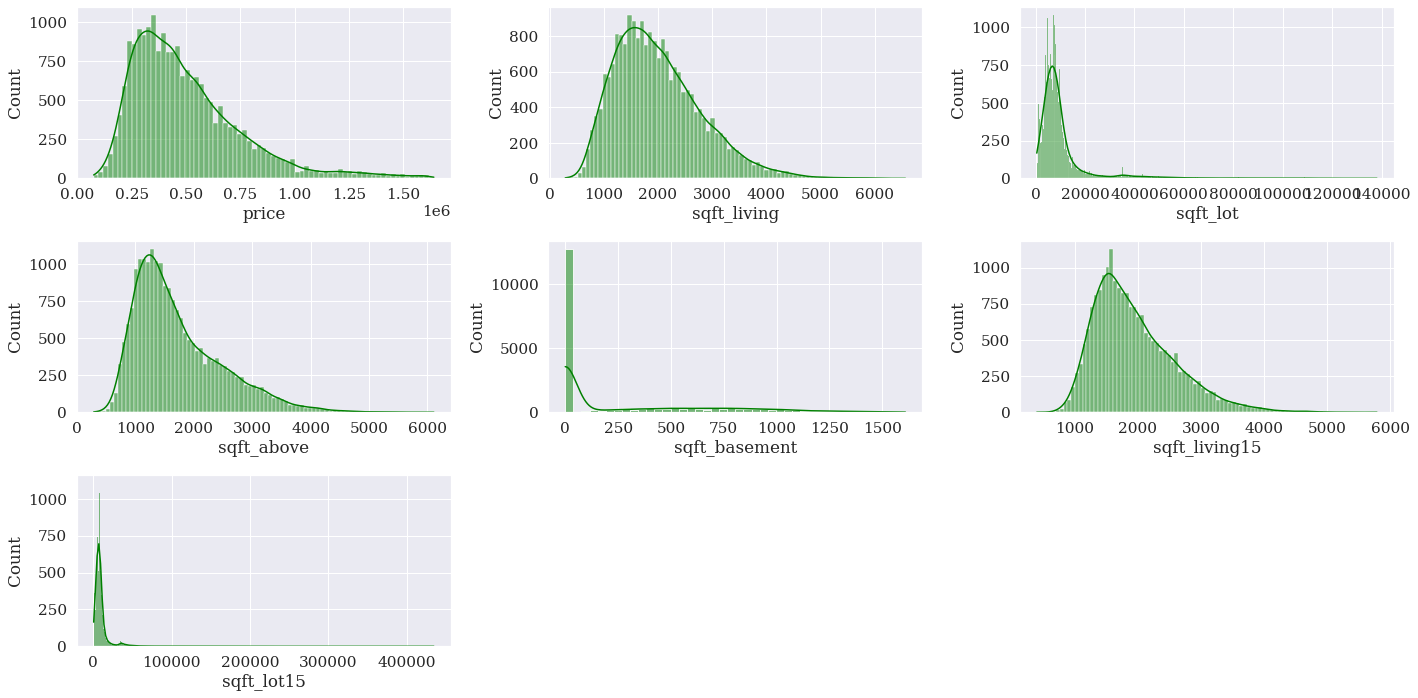

In [231]:
#Visão com outiliers
plt.figure(figsize = (20, 10))
for i in range(0, len(num)):
    plt.subplot(3, 3, i+1)
    sns.histplot(x = df_outliers_so[features[i]], kde = True, color = 'green')
    plt.xlabel(features[i])
    plt.tight_layout()

Para análise dos outiliers considerei o cálculo do **Z-score**
Z-scores são o número de desvios padrão acima e abaixo da média, para este estudo, foi ignorado tudo o que estava +/- 3 desvio padrão da média

### Engenharia de Features

In [232]:
#criando o campo de quantidade de vendas
df_sales = pd.DataFrame(df_outliers_so.id.value_counts()).reset_index()
df_sales = df_sales.rename(columns={'index': 'id', 'id': 'amount_sales'})
print("Total de imóveis vendidos mais de uma vez corresponde à ",df_sales[df_sales['amount_sales']>1].shape[0])
df_sales.head(10)

Total de imóveis vendidos mais de uma vez corresponde à  171


,id,amount_sales
0,795000620,3
1,7961500010,2
2,3883800011,2
3,2619920170,2
4,3333002450,2
5,7657000540,2
6,3935900232,2
7,1825069031,2
8,8648900110,2
9,8121100395,2


In [233]:
#criando o campo de quantidade de imóveis por zipcode
df_zipcode = pd.DataFrame(df_outliers_so.zipcode.value_counts()).reset_index()
df_zipcode.head()

,index,zipcode
0,98103,601
1,98115,579
2,98052,571
3,98038,559
4,98117,551


In [234]:
#criando o campo de quantidade de vendas
df_zipcode = pd.DataFrame(df_outliers_so.zipcode.value_counts()).reset_index()
df_zipcode = df_zipcode.rename(columns={'index': 'zipcode', 'zipcode': 'amount_zipcode'})
print("Total de imóveis vendidos mais de uma vez corresponde à ",df_zipcode[df_zipcode['amount_zipcode']>1].shape[0])
df_zipcode.head(10)

Total de imóveis vendidos mais de uma vez corresponde à  70


,zipcode,amount_zipcode
0,98103,601
1,98115,579
2,98052,571
3,98038,559
4,98117,551
5,98042,535
6,98034,534
7,98118,501
8,98023,498
9,98133,493


In [235]:
# # Cidade:
# zcdb = ZipCodeDatabase()
# city = []

# #Mapeando todos cep
# for zipcode in df_zipcode['zipcode']:
#     try:
#         zc = zcdb[zipcode]
#         city.append(zc.city)

#     except KeyError:
#         if zipcode == 98077:
#             city.append(str('Woodinville'))
#         else:
#             city.append(str('nan'))

# df_zipcode['city'] = city

In [236]:
###################################################################
search = SearchEngine()
city = []
#Mapeando todos cep
for zipcode in df_zipcode['zipcode']:
    result = search.by_zipcode(zipcode)
    city_name = result.major_city
    city.append(city_name)
df_zipcode['city'] = city

In [237]:
print("Total de imóveis em mais de um zipcode corresponde à ",df_zipcode[df_zipcode['amount_zipcode']>1].shape[0])
df_zipcode = df_zipcode[["zipcode", "city",	"amount_zipcode"]]
df_zipcode.head(10)

Total de imóveis em mais de um zipcode corresponde à  70


,zipcode,city,amount_zipcode
0,98103,Seattle,601
1,98115,Seattle,579
2,98052,Redmond,571
3,98038,Maple Valley,559
4,98117,Seattle,551
5,98042,Kent,535
6,98034,Kirkland,534
7,98118,Seattle,501
8,98023,Federal Way,498
9,98133,Seattle,493


In [238]:
df_zipcode.info()

Exception ignored in: <function SearchEngine.__del__ at 0x7fc4befda8b0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/uszipcode/search.py", line 196, in __del__
  File "/usr/local/lib/python3.8/dist-packages/uszipcode/search.py", line 202, in close
  File "/usr/local/lib/python3.8/dist-packages/sqlalchemy/orm/session.py", line 1811, in close
  File "/usr/local/lib/python3.8/dist-packages/sqlalchemy/orm/session.py", line 1853, in _close_impl
  File "/usr/local/lib/python3.8/dist-packages/sqlalchemy/orm/session.py", line 923, in close
  File "/usr/local/lib/python3.8/dist-packages/sqlalchemy/engine/base.py", line 2416, in close
  File "/usr/local/lib/python3.8/dist-packages/sqlalchemy/engine/base.py", line 2639, in _do_close
  File "/usr/local/lib/python3.8/dist-packages/sqlalchemy/engine/base.py", line 2625, in _close_impl
  File "/usr/local/lib/python3.8/dist-packages/sqlalchemy/engine/base.py", line 2617, in _connection_rollback_impl
  File "/usr/lo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   zipcode         70 non-null     int64 
 1   city            70 non-null     object
 2   amount_zipcode  70 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.8+ KB


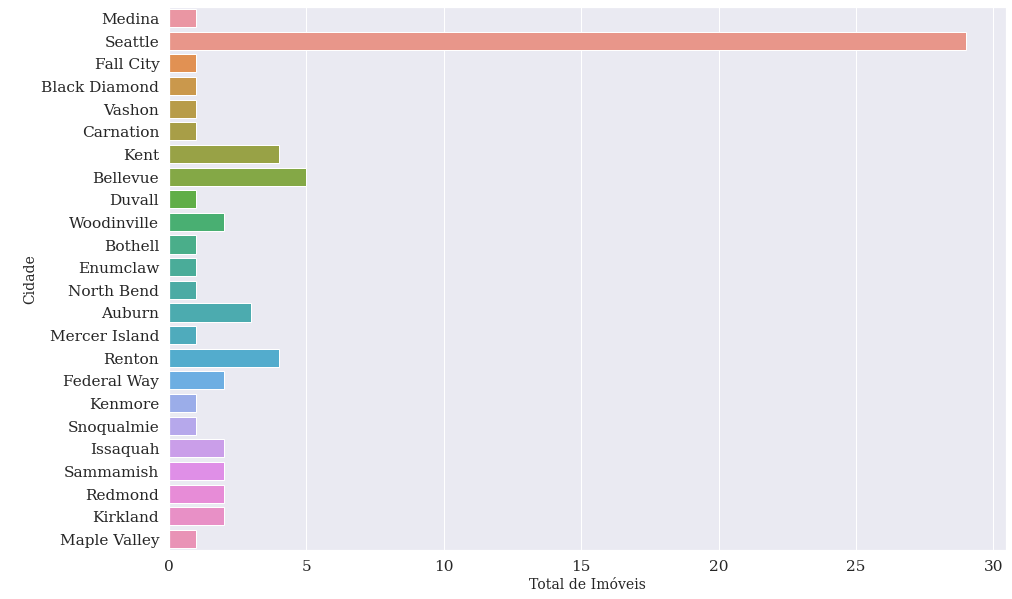

In [239]:
# Gráfico 1 - Análise em Valores Absolutos

# Tamanho da figura
plt.figure(figsize = (15,10))

# Chart
chart = sns.countplot(data = df_zipcode.sort_values(by=["amount_zipcode"],ascending="False"), 
                      y = 'city')

# Estilo e labels
chart.set_ylabel("\nCidade", fontsize = 14)
chart.set_xlabel("Total de Imóveis", fontsize = 14)

plt.show()

In [240]:
# find the row of the house which has the highest price
maxpr=df.loc[df['price'].idxmax()]

# define a function to draw a basemap easily
def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

df_copy = df.copy()
# select a zipcode for the heatmap
#set(df['zipcode'])
#df_copy = df[df['zipcode']==98001].copy()
df_copy['count'] = 1
basemap = generateBaseMap()
# add carton position map
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
# add a marker for the house which has the highest price
folium.Marker([maxpr['lat'], maxpr['long']],popup='Highest Price: $'+str(format(maxpr['price'],'.0f')),
              icon=folium.Icon(color='green')).add_to(s)
# add heatmap
HeatMap(data=df_copy[['lat','long','count']].groupby(['lat','long']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap

Percebemos que poucos imóveis tiveram mais de uma venda e também que a grande maioria está concentrada na cidade de Seattle

### Detcção de padrões

<AxesSubplot:>

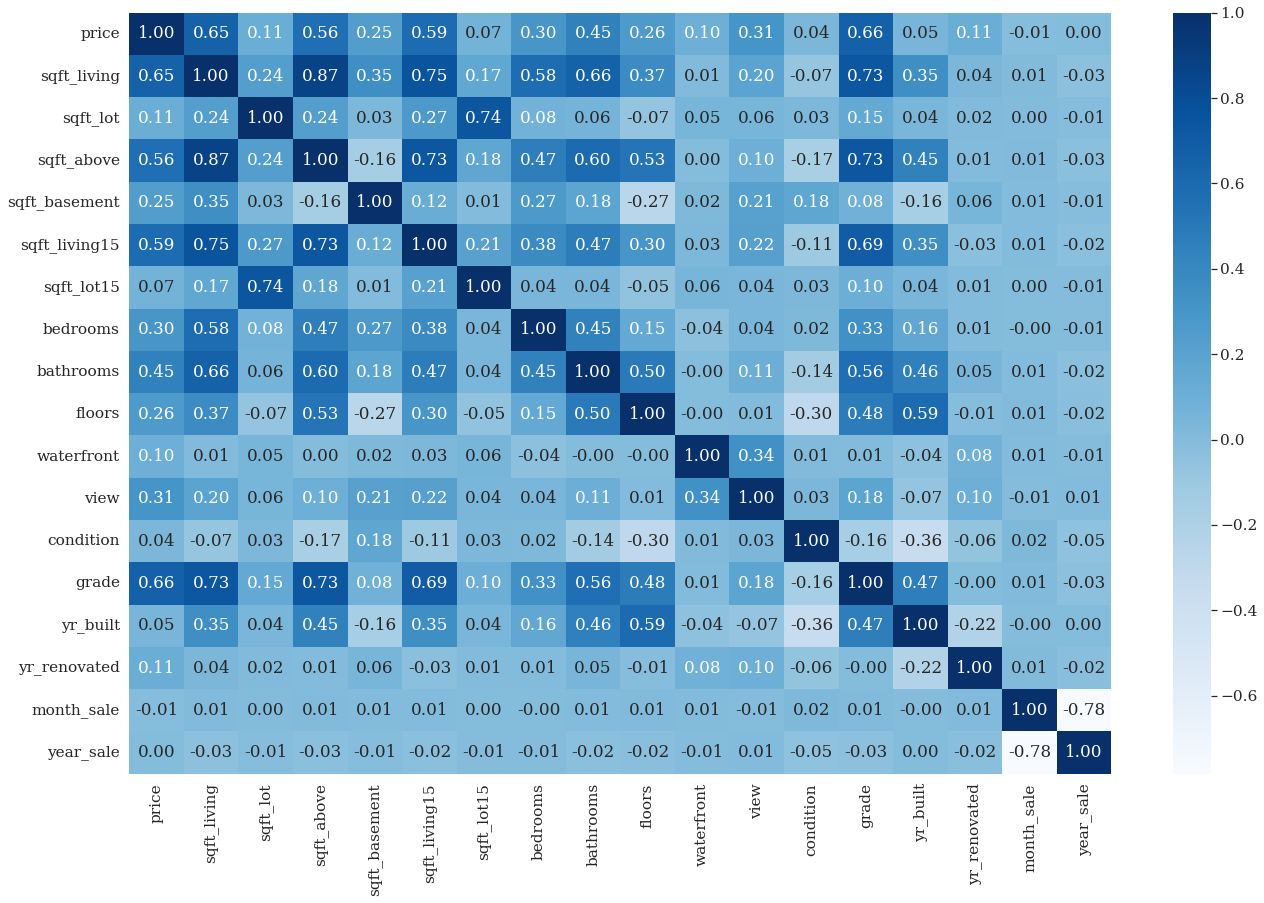

In [241]:
plt.figure(figsize = (22,14))
sns.heatmap(df_outliers_so[cat_num].corr(), cmap = 'Blues', annot = True, fmt = '.2f')

In [245]:
df_outliers_so.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sale,year_sale
count,2.070700e+04,2.070700e+04,20707.000000,20707.000000,20707.000000,20707.000000,20707.000000,20707.000000,20707.000000,20707.000000,20707.000000,20707.000000,20707.00000,20707.000000,20707.000000,20707.000000,20707.000000,20707.000000,20707.000000,20707.000000,20707.000000,20707.000000
mean,4.630322e+09,5.012844e+05,3.343990,1.708698,2002.910658,10713.852755,1.440238,0.004250,0.191433,3.407930,7.582557,1734.495388,268.41527,1970.706379,79.507703,98078.942097,47.560082,-122.216625,1945.538127,10348.546385,6.575747,2014.322886
std,2.877077e+09,2.548682e+05,0.914345,0.686799,801.175735,13612.161835,0.552157,0.065053,0.681798,0.648696,1.095058,758.982792,400.08920,29.408039,390.334749,53.484299,0.138774,0.139336,646.272915,15906.371855,3.113457,0.467591
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,520.000000,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.00000,1900.000000,0.000000,98001.000000,47.155900,-122.512000,399.000000,651.000000,1.000000,2014.000000
25%,2.159850e+09,3.170000e+05,3.000000,1.000000,1410.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.00000,1951.000000,0.000000,98033.000000,47.470500,-122.331000,1470.000000,5029.000000,4.000000,2014.000000
50%,3.991400e+09,4.420000e+05,3.000000,2.000000,1880.000000,7490.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.00000,1974.000000,0.000000,98070.000000,47.570700,-122.236000,1810.000000,7500.000000,6.000000,2014.000000
75%,7.351200e+09,6.220000e+05,4.000000,2.000000,2470.000000,10200.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2140.000000,530.00000,1996.000000,0.000000,98118.000000,47.679200,-122.128000,2307.500000,9800.000000,9.000000,2015.000000
max,9.900000e+09,1.640000e+06,33.000000,7.000000,6563.000000,138085.000000,3.000000,1.000000,4.000000,5.000000,12.000000,6110.000000,1610.00000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,434728.000000,12.000000,2015.000000


In [244]:
df = df_outliers_so.copy()

In [247]:
scr_card = [['price', "(df['price']>= 31700) & (df['price']<= 62200)",3],
            ['living', "(df['sqft_living']>= 1410) & (df['sqft_living']<= 62200)",5],
            ['above', "(df['sqft_above']>= 5000) & (df['sqft_above']<= 62200)",4],
            ['living15', "(df['sqft_living15']>= 1470) & (df['sqft_living15']<= 2307)",3],
            ['bathrooms', "(df['bathrooms']>= 1) & (df['bathrooms']<= 2)",3],
            ['grade', "(df['grade']>= 7) & (df['grade']<= 8)",5],
            ]
scr_card_df = pd.DataFrame(scr_card, columns = ['indicator', 'condition', 'score'])

In [248]:
indicators_list = scr_card_df['indicator'].tolist()
indicators_list = ['score_' + i for i in indicators_list]

df = df.reindex(columns=df.columns.tolist() + indicators_list)

In [249]:
for index, row in scr_card_df.iterrows():
  indicator = row['indicator']
  scr_indicator = 'score_' + indicator
  condition = row['condition']
  scr = scr_card_df.loc[scr_card_df['indicator'] == indicator, 'score'].values[0].item()
  df[scr_indicator] = 0
  df.loc[eval(condition), scr_indicator] = scr

In [251]:
#pd.set_option('compute.ops_on_diff_frames', True)
df['house_score'] = df[indicators_list].sum(axis=1)
#mlp_df_ok.loc[mlp_df_ok['pld_score'] >=100, 'pld_score'] = 99

In [252]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sale,year_sale,score_price,score_living,score_above,score_living15,score_bathrooms,score_grade,house_score
0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014,0,0,0,0,3,5,8
1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014,0,5,0,3,3,5,16
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015,0,0,0,0,3,0,3
3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014,0,5,0,0,0,5,10
4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015,0,5,0,3,3,5,16


In [255]:
df.house_score.describe()

count    20707.000000
mean        11.531076
std          4.191914
min          0.000000
25%          8.000000
50%         13.000000
75%         16.000000
max         16.000000
Name: house_score, dtype: float64

In [259]:
print("A maior pontuação é: ",df.house_score.max())
print("A menor pontuação é: ",df.house_score.min())
print(df[df['house_score']>=16].shape[0], "Imóveis possuem um score de venda alto")
print(df[df['house_score']<=0].shape[0], "Imóveis possuem um score de venda baixo")

A maior pontuação é:  16
A menor pontuação é:  0
7226 Imóveis possuem um score de venda alto
42 Imóveis possuem um score de venda baixo


In [269]:
df_melhores_im = df[df["house_score"]>=16].sort_values(by='price',ascending=False)
df_melhores_im.id.head(5)

15892    4389200876
13419    2525049246
11686    6096500105
6823     8964800225
11874    3931900510
Name: id, dtype: int64

In [268]:
df_piores_im = df[df["house_score"]==0].sort_values(by='price')
df_piores_im.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sale,year_sale,score_price,score_living,score_above,score_living15,score_bathrooms,score_grade,house_score
1149,3421079032,2015-02-17,75000.0,1,0,670,43377,1,0,0,3,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882,2,2015,0,0,0,0,0,0,0
465,8658300340,2014-05-23,80000.0,1,0,430,5050,1,0,0,2,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500,5,2014,0,0,0,0,0,0,0
3805,7335400215,2015-05-05,95000.0,1,0,760,5746,1,0,0,4,5,760,0,1915,0,98002,47.3046,-122.215,970,6696,5,2015,0,0,0,0,0,0,0
16340,6146600170,2014-07-03,100000.0,2,0,660,5240,1,0,0,4,4,660,0,1912,0,98032,47.3881,-122.234,850,5080,7,2014,0,0,0,0,0,0,0
18508,623049232,2014-07-15,115000.0,2,0,550,7980,1,0,0,3,5,550,0,1952,0,98146,47.5110,-122.348,1330,7980,7,2014,0,0,0,0,0,0,0


### Conclusão

Com base nas análise de correlação, selecionei as que apresentaram as relações mais fortes e acrescentei mais pontos de acordo com váriavel mais relacionada com as demais **(Considerei apenas os coeficientes de correlação >= 0.6)**.
* price = 2 relações = 3 pontos
* living = 4 relações = 5 pontos
* above = 3 relações = 4 pontos
* living_15 = 2 relações = 3 pontos
* batrhooms = 2 relações = 3 pontos
* grade = 4 relações = 5 pontos

Após isso criei colunas de score pra cada variável e no fim selecionei as com maiores e piores pontos, considerando também os maiores e piores preços dos imóveis

TOP 5 imóveis que a empresa deveria investir de acordo com as características e maiores valores:
1. 4389200876
2. 2525049246
3. 6096500105
4. 8964800225
5. 3931900510

***##########################################################################################***

TOP 5 imóveis que a empresa não deveria investir de acordo com as características e piores valores:
1. 3421079032
2. 8658300340
3. 7335400215
3. 6146600170
3. 623049232